# Introduction

Dataset used in this notebook was created to develop a model that would be able to automatically determine the occurrence of a faults related to the outdoor temperature sensor bias. This dataset was created using large office building model. The building model was developed using co-simulation framework - building envelope model (using EnergyPlus) and building HVAC system model (using Dymola). Method of simulating fault was by directly manually impose in the simulation model by overriding the control signals. Each fault lasts for one day (midnight-to-midnight).

The indications of the outdoor temperature sensor are important because in some cases they can affect the automation of HVAC devices. An error in this case could lead to suboptimal operation of the system and cause increased energy consumption or failure to meet the set air parameters.

Authors of the dataset provided following data:

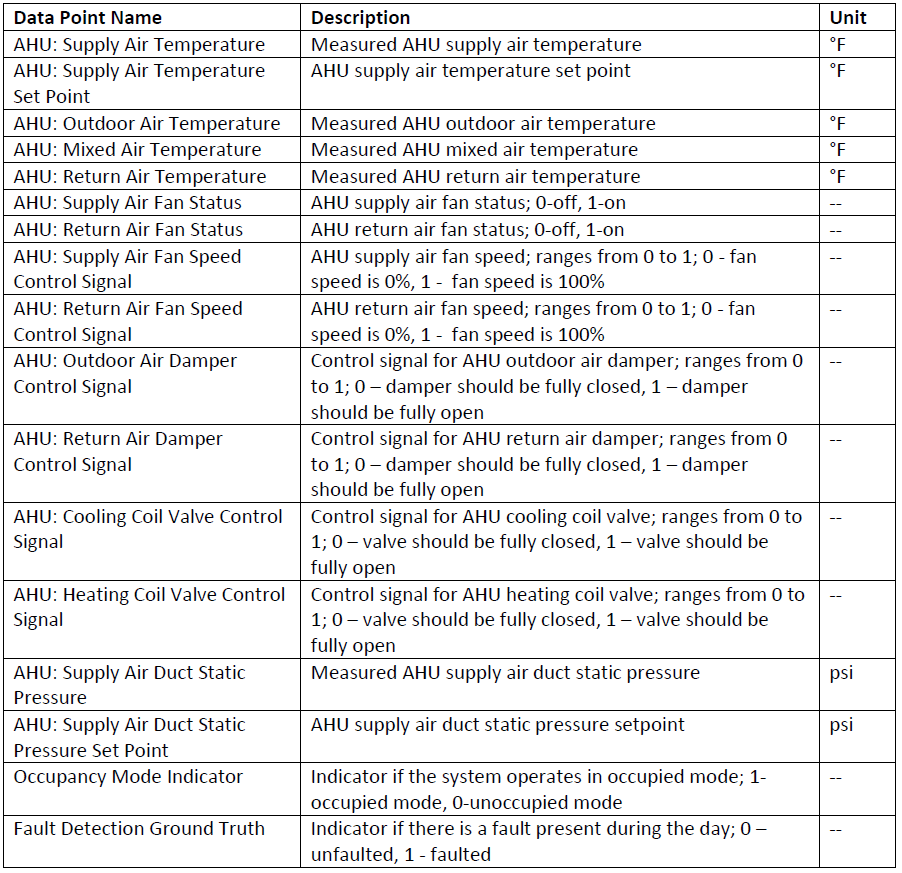

# Data exploration and feature engineering

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('MZVAV-1.csv')

In [88]:
data.sample(5)

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
128316,6/17/2017 2:36,51.70,55.04,39.37,66.09,70.94,0,0,0.00,0.00,0.0,0.0,0.00,0,0.04,0.00,0,1
69958,3/19/2017 13:58,55.04,55.04,30.84,63.90,63.91,1,1,1.00,1.00,0.0,0.0,0.01,0,0.04,0.11,0,1
127138,6/16/2017 6:58,53.02,55.04,45.81,55.06,72.10,1,1,0.64,0.64,0.9,0.0,0.03,0,0.04,0.04,1,1
257940,12/8/2017 3:00,50.23,55.04,33.44,62.08,68.38,0,0,0.00,0.00,0.0,0.0,0.00,0,0.04,0.00,0,1
152613,8/14/2017 23:33,54.13,55.04,59.06,72.32,75.02,0,0,0.00,0.00,0.0,0.0,0.03,0,0.04,0.00,0,1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Datetime                                        272160 non-null  object 
 1   AHU: Supply Air Temperature                     272160 non-null  float64
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64
 4   AHU: Mixed Air Temperature                      272160 non-null  float64
 5   AHU: Return Air Temperature                     272160 non-null  float64
 6   AHU: Supply Air Fan Status                      272160 non-null  int64  
 7   AHU: Return Air Fan Status                      272160 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        272160 non-null  float64
 9   AHU: Return Air Fan Speed 

We can see that the dataset contains all the columns described by the authors. Dataset doesn't contain any null values, and all columns datatypes besides "Datetime" are already good for the model building. Therefore dataset doesn't need any cleaning besides, changing "Datetime" columnt to datetime data type.

In [90]:
# Changing data type of the Datetime column
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [91]:
data.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000
mean,53.762030,5.504000e+01,48.357590,65.000186,71.453754,0.670242,0.670242,0.480342,0.480342,0.213219,0.000009,0.043273,0.000077,4.000000e-02,0.034261,0.487654,0.857143
std,2.545891,3.741583e-10,20.154449,7.409942,3.702466,0.470126,0.470126,0.353275,0.353275,0.325107,0.004696,0.083905,0.008784,1.908546e-13,0.032849,0.499848,0.349928
min,44.950000,5.504000e+01,-14.260000,22.610000,54.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-02,-0.020000,0.000000,0.000000
25%,52.000000,5.504000e+01,36.320000,57.030000,70.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,4.000000e-02,0.000000,0.000000,1.000000
50%,54.070000,5.504000e+01,52.340000,65.570000,72.010000,1.000000,1.000000,0.640000,0.640000,0.000000,0.000000,0.020000,0.000000,4.000000e-02,0.040000,0.000000,1.000000
75%,55.040000,5.504000e+01,62.610000,72.020000,74.260000,1.000000,1.000000,0.670000,0.670000,0.240000,0.000000,0.040000,0.000000,4.000000e-02,0.040000,1.000000,1.000000
max,72.030000,5.504000e+01,90.140000,78.720000,87.870000,1.000000,1.000000,1.000000,1.000000,1.000000,2.450000,0.600000,1.000000,4.000000e-02,0.120000,1.000000,1.000000


We can see that two columns "AHU: Supply Air Temperature Set Point" and "AHU: Supply Air Duct Static Pressure Set Point" have basically constant values therefore they will probably won't be helpful in building this model. The "Fault Detection Ground Truth" column draws attention because probably this column was intended as target column and it appears that 85% contain data with a faults. That means that data is not balanced and we will probably need some kind of taget engineering or data balancing for model to work.

In [92]:
data = data.drop(['AHU: Supply Air Temperature Set Point', 'AHU: Supply Air Duct Static Pressure Set Point'], axis=1)

<AxesSubplot:>

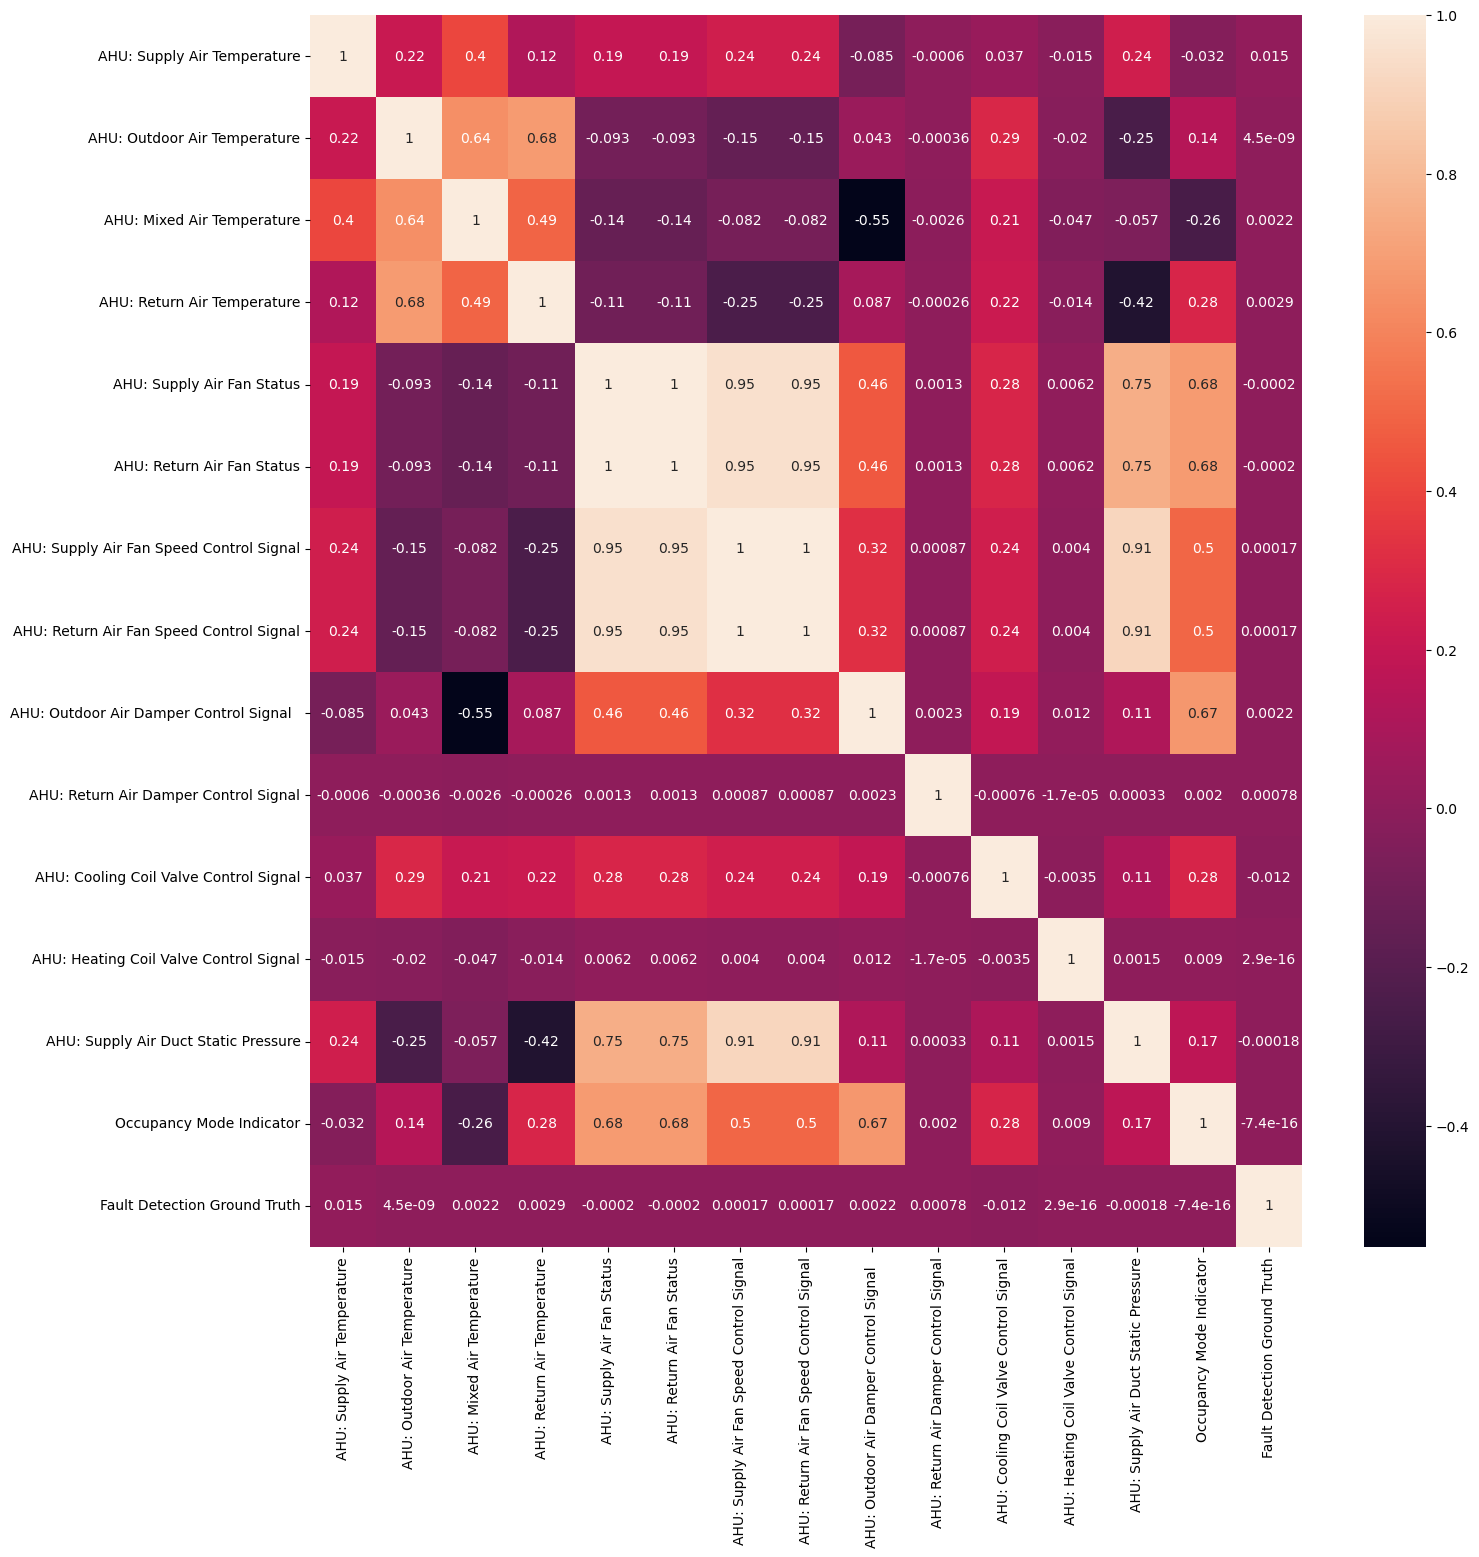

In [93]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

We can see that 4 of the columns are highly correlated with each other: "AHU: Supply Air Fan Status", "AHU: Return Air Fan Status", "AHU: Supply Air Fan Speed Control Signal", "AHU: Return Air Fan Speed Control Signal". This is probalby due to the control sequence and all this columns are basically the same. Therefore we can only leave one of them.

In [94]:
data = data.drop(['AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal'], axis=1)

<AxesSubplot:>

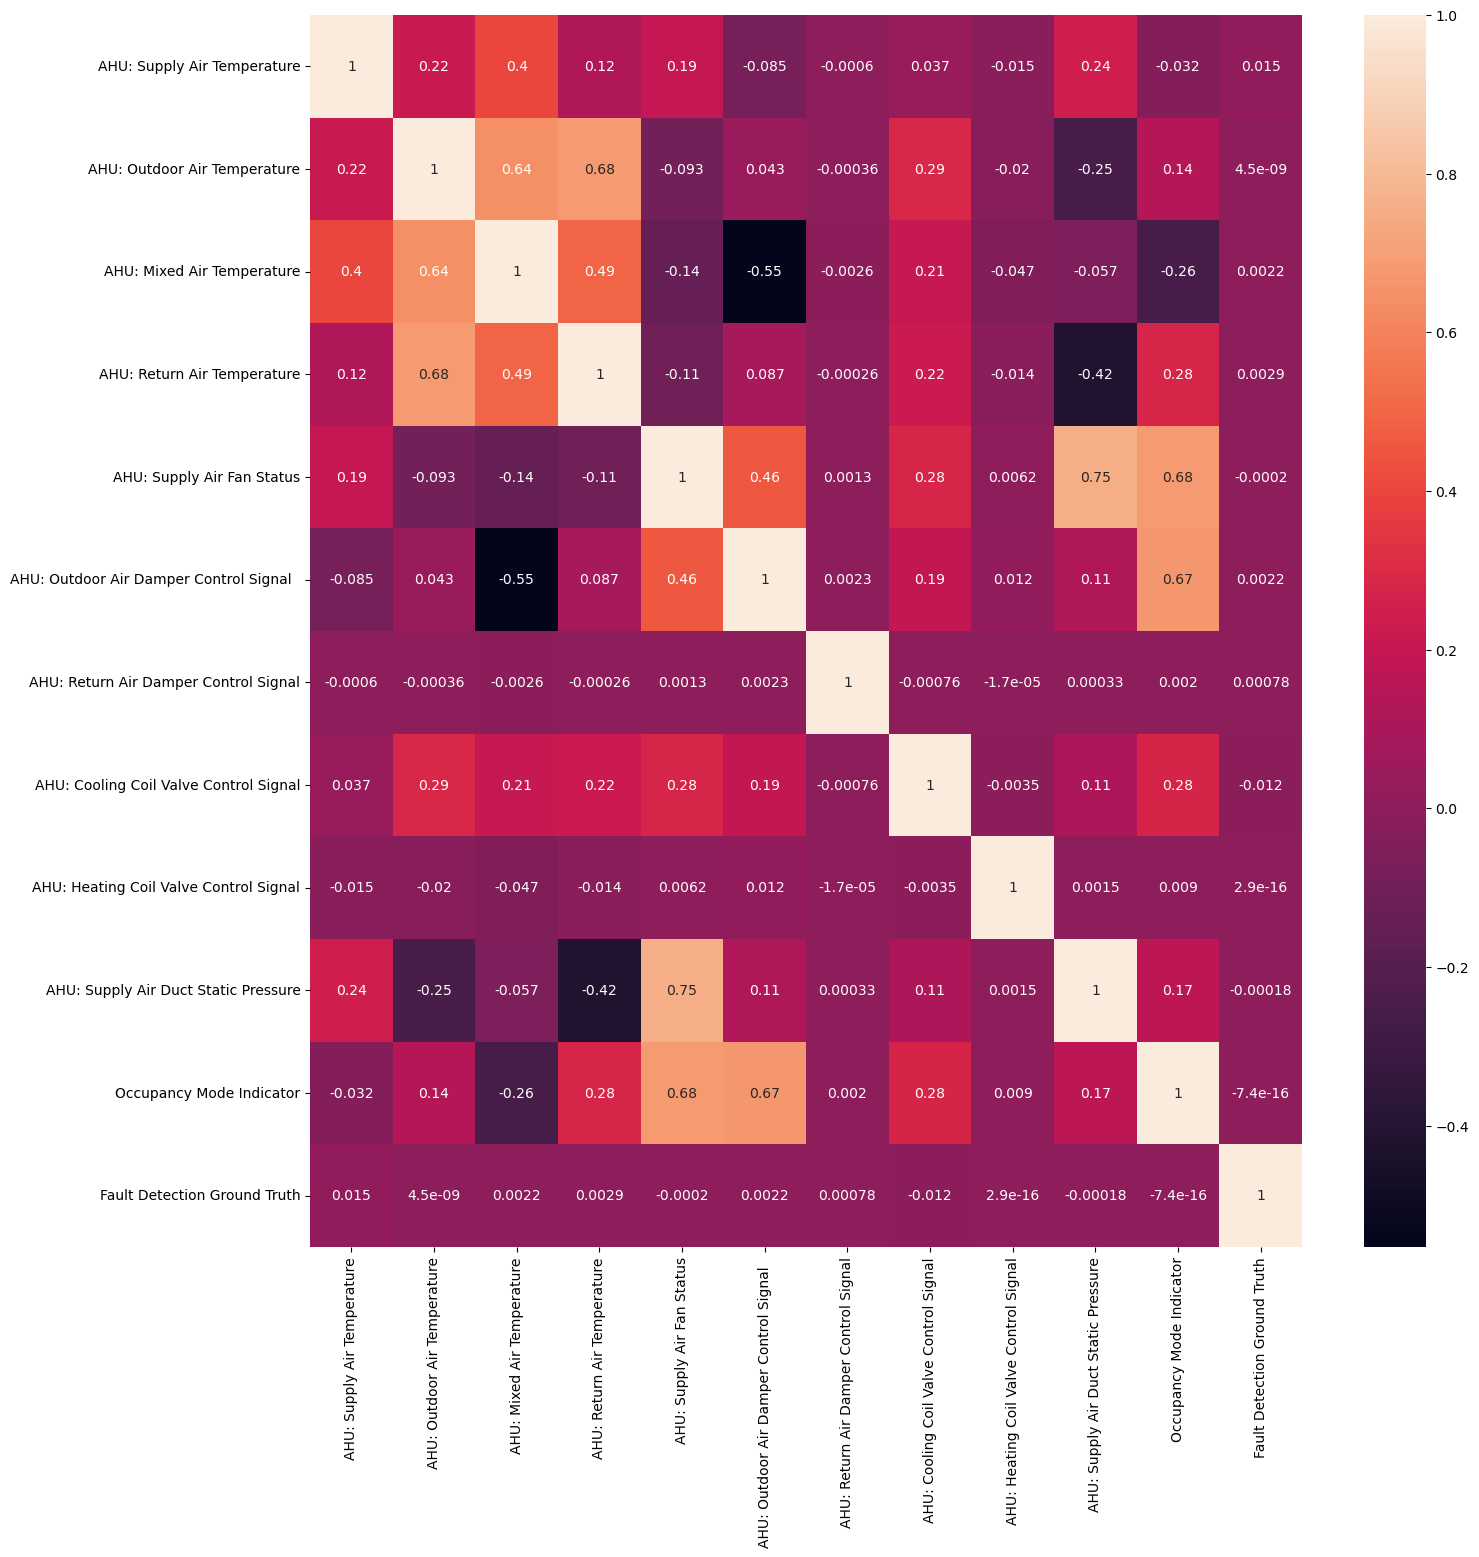

In [95]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

On the above correlation map we can also see that the column "Fault Detection Ground Truth" isn't correlated with anything. This column has a binary values simply meaning occurence or absent of fault. This mean that this problem probably couldn't be solved simply by the classification algorithm. 

We probably can solve this problem as a regression problem and we can try two diffrent apporaches. First one is by changing target from column "Fault Detection Ground Truth" to the column "AHU: Outdoor Air Temperature" and examine the diffrence between actual and predicted by model values. That way we not only know if there is a fault or not, but also how big the bias is. Second approach is to make "Bias" column witch will contain value of bias decribed by authors and will be the target of the model.

Question now it is even posiible to predict outside air temperature using data from the Air Handling Unit. Whatever happens inside the AHU doesn't affect the weather. The answer lies in the structure of AHU and their control sequence. During Occupied Mode sequence of operation outside air is mixed with return air from the office in mixed air chamber. We can see this in correlation map above where return, mixed and outdoor air temperatures are highly correlated with each other. We can also see this in the graph below.

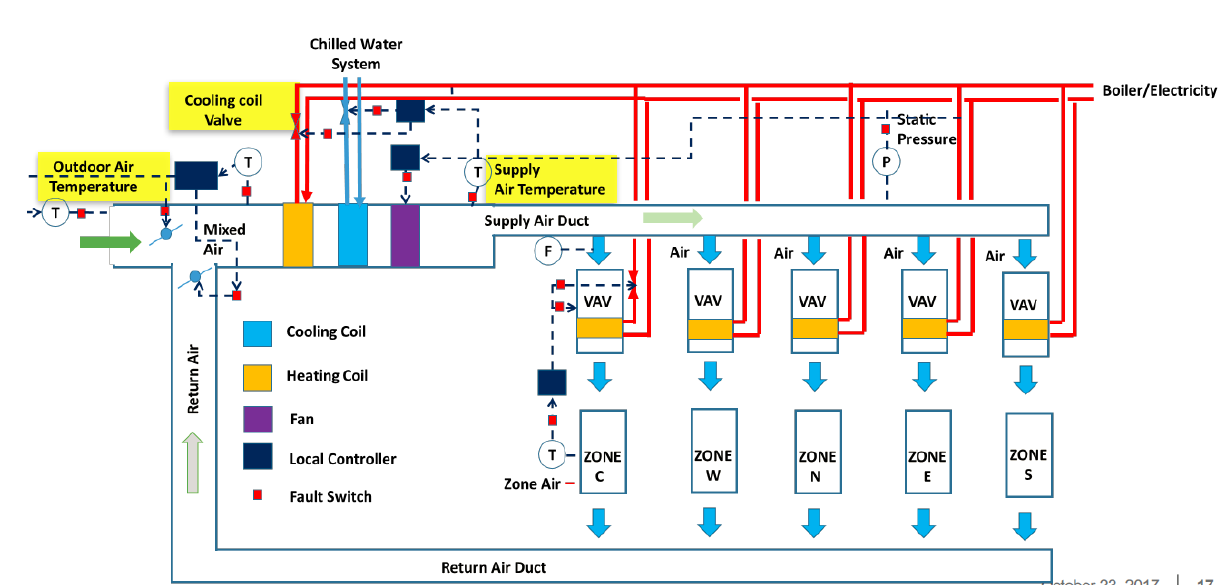

This means that this approach makes sense only when the control panel is in Occupied mode and when it is turned on at all. Therefore, we need to limit the data range to the time the AHU is in Occupied mode and the fan is on.

In [96]:
data = data[(data['AHU: Supply Air Fan Status']==1) & (data['Occupancy Mode Indicator'] ==1)]

In [97]:
# We can drop columns 'AHU: Supply Air Fan Status','Occupancy Mode Indicator' now, because in dataset they have constant value now.
data.drop(['AHU: Supply Air Fan Status','Occupancy Mode Indicator'], axis=1, inplace=True)

In [98]:
data.describe()

,AHU: Supply Air Temperature,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure,Fault Detection Ground Truth
count,132720.000000,132720.000000,132720.000000,132720.000000,132720.000000,132720.000000,132720.000000,132720.000000,1.327200e+05,132720.000000
mean,53.679286,51.335159,63.037677,72.530509,0.437234,0.000018,0.067174,0.000158,4.000000e-02,0.857143
std,1.643037,21.076830,8.745370,1.849449,0.344664,0.006725,0.096475,0.012578,3.200924e-14,0.349928
min,47.350000,-14.260000,22.610000,55.090000,0.140000,0.000000,0.010000,0.000000,4.000000e-02,0.000000
25%,52.150000,38.360000,55.050000,71.100000,0.140000,0.000000,0.010000,0.000000,4.000000e-02,1.000000
50%,54.050000,56.490000,57.400000,72.400000,0.250000,0.000000,0.030000,0.000000,4.000000e-02,1.000000
75%,55.060000,66.230000,72.610000,74.300000,0.820000,0.000000,0.070000,0.000000,4.000000e-02,1.000000
max,58.700000,90.140000,76.740000,87.870000,1.000000,2.450000,0.490000,1.000000,4.000000e-02,1.000000


After dropping "AHU: Supply Air Fan Status" column "AHU: Supply Air Duct Static Pressure" have constant value so it also should be dropped from the dataset to prevent overfitting.

In [99]:
data.drop('AHU: Supply Air Duct Static Pressure', axis=1, inplace=True)

<AxesSubplot:>

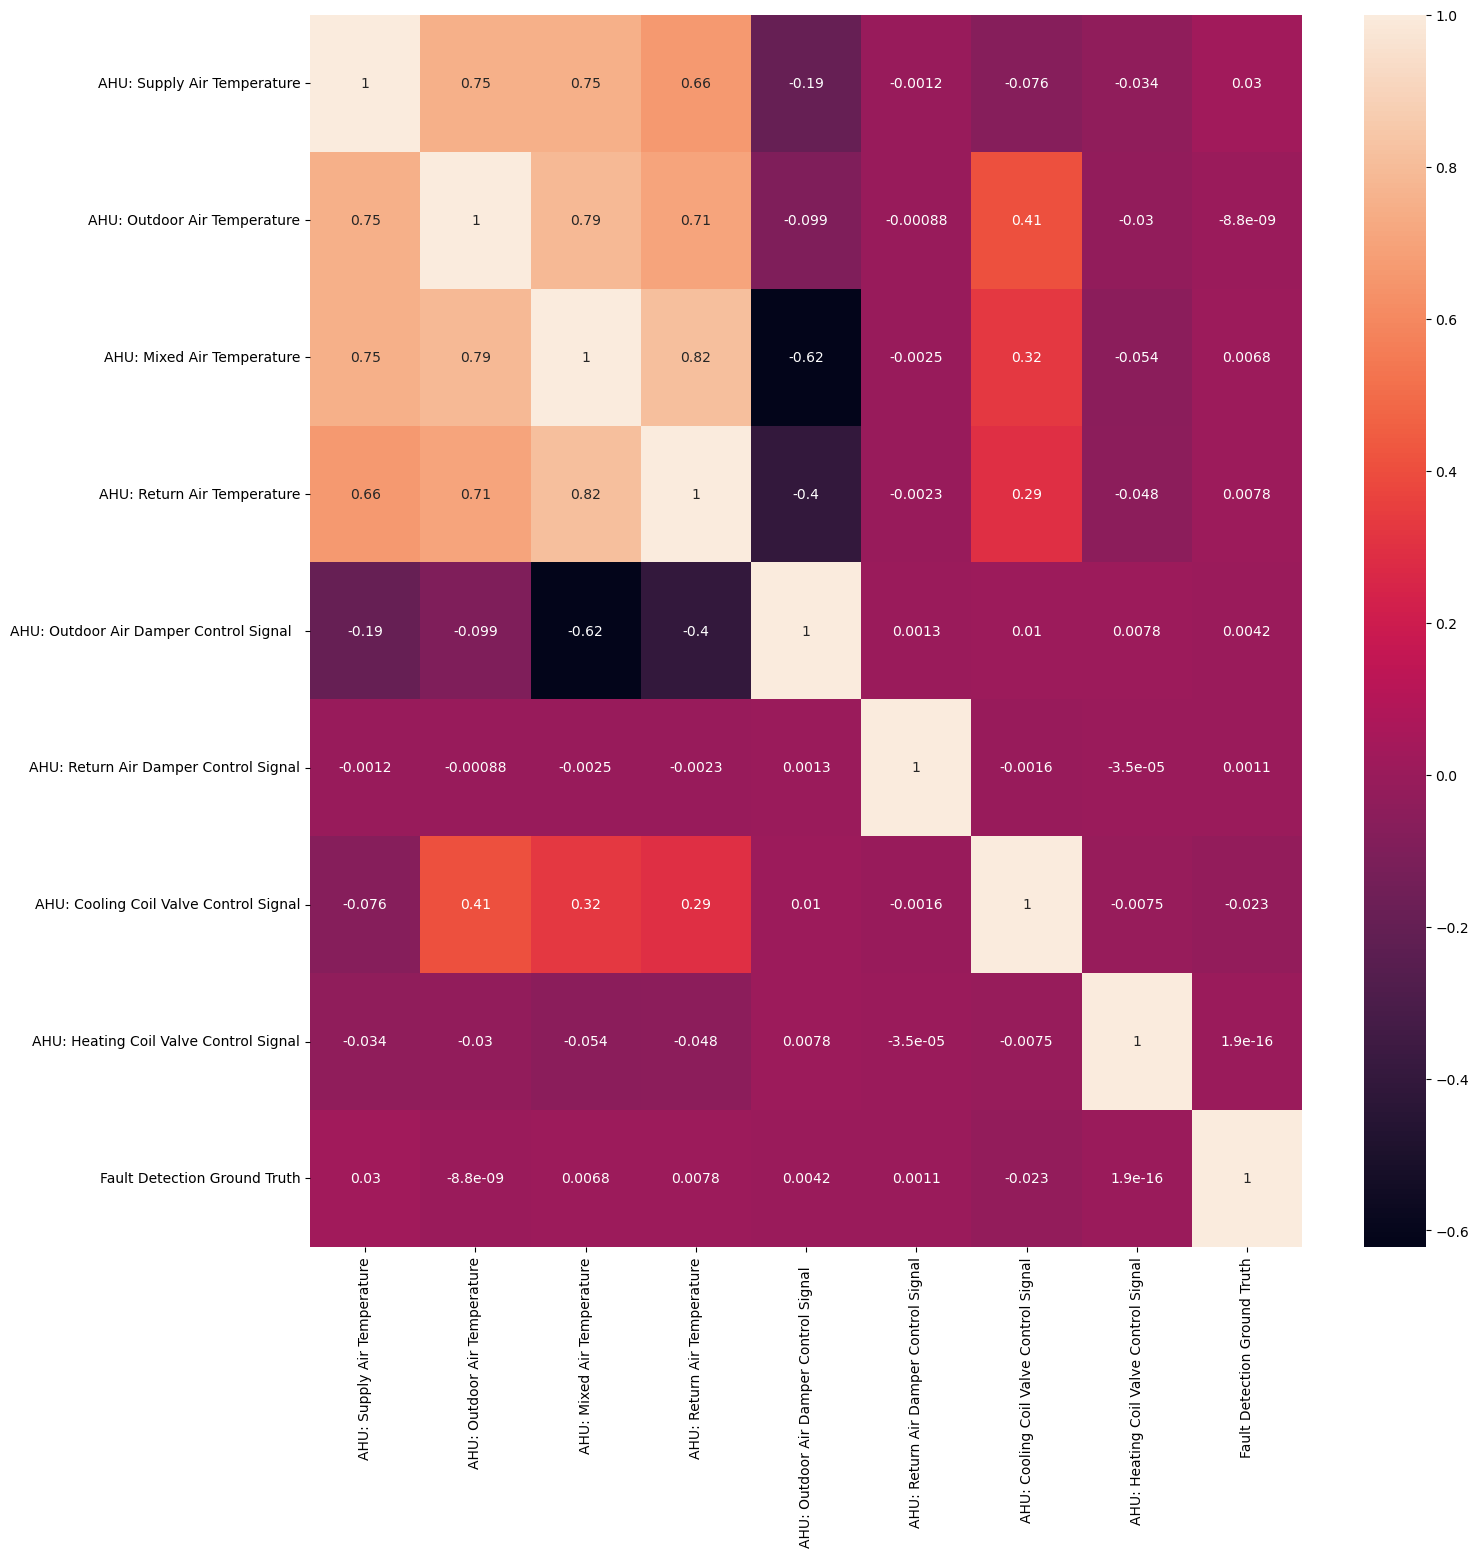

In [100]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

Dataset looks now that it have all needed data to correctly predict to outdoor air temperature sensor readings.

# Model building

## Method 1 - outside air temperature as a target

### Data preparation

To build model correctly we must use only unfaulted data on the other hand model will learn on incorrect data which could dramatically lower it's utility. Dataset is quite big so unfaulted data sould be sufficient to do this task.

In [101]:
X = data[data['Fault Detection Ground Truth'] == 0]

In [102]:
X = data.drop(['Datetime','Fault Detection Ground Truth', 'AHU: Outdoor Air Temperature'], axis=1)

In [103]:
y = data['AHU: Outdoor Air Temperature']

### Train test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

### Regression model training

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [107]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [108]:
# preparing list of regression algorithms to choose the best one
regressors = [['KNeighborsRegressor', KNeighborsRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['CatBoostRegressor', CatBoostRegressor()],
              ['BaggingRegressor', BaggingRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['DecisionTreeRegressor', DecisionTreeRegressor()],
              ['LinearRegression', LinearRegression()]]

In [109]:
# preparing DataFrame to store model evauation parameters
results_accuracy = pd.DataFrame(index=None, columns=['model','train_R2','test_R2','train_Mae','test_Mae','train_Mse','test_Mse'])

In [110]:
data_1 = data.copy()

In [111]:
# creating the loop to train and evaluate each model, creating predictions for whole dataset for each model
feat_data = data.drop(['Datetime','Fault Detection Ground Truth', 'AHU: Outdoor Air Temperature'], axis=1)
models = []
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train)
    models.append(model)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)  
    results_accuracy = results_accuracy.append(pd.Series({'model':name, 
                                'train_R2':R2_train,
                                'test_R2':R2_test,
                                'train_Mae':mae_train,
                                'test_Mae':mae_test,
                                'train_Mse':mse_train,
                                'test_Mse':mse_test}),ignore_index=True )
    data_1[f'{name} prediction'] = model.predict(feat_data)
    data_1[f'{name} anomaly'] = data_1['AHU: Outdoor Air Temperature'] - data_1[f'{name} prediction']

C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from p

Learning rate set to 0.087171
0:	learn: 19.3815607	total: 33.7ms	remaining: 33.7s
1:	learn: 17.8232063	total: 48.3ms	remaining: 24.1s
2:	learn: 16.4039097	total: 63.2ms	remaining: 21s
3:	learn: 15.1152808	total: 77.5ms	remaining: 19.3s
4:	learn: 13.9399326	total: 94ms	remaining: 18.7s
5:	learn: 12.8634258	total: 115ms	remaining: 19s
6:	learn: 11.9101055	total: 130ms	remaining: 18.5s
7:	learn: 11.0361777	total: 144ms	remaining: 17.9s
8:	learn: 10.2422618	total: 164ms	remaining: 18s
9:	learn: 9.5285878	total: 181ms	remaining: 17.9s
10:	learn: 8.8855140	total: 196ms	remaining: 17.6s
11:	learn: 8.3047079	total: 211ms	remaining: 17.4s
12:	learn: 7.7920650	total: 226ms	remaining: 17.1s
13:	learn: 7.3260304	total: 241ms	remaining: 17s
14:	learn: 6.9112983	total: 256ms	remaining: 16.8s
15:	learn: 6.5400584	total: 270ms	remaining: 16.6s
16:	learn: 6.2157335	total: 285ms	remaining: 16.5s
17:	learn: 5.9346940	total: 301ms	remaining: 16.4s
18:	learn: 5.6809584	total: 316ms	remaining: 16.3s
19:	lea

173:	learn: 3.7998249	total: 2.77s	remaining: 13.1s
174:	learn: 3.7989059	total: 2.78s	remaining: 13.1s
175:	learn: 3.7984100	total: 2.8s	remaining: 13.1s
176:	learn: 3.7973428	total: 2.81s	remaining: 13.1s
177:	learn: 3.7968315	total: 2.83s	remaining: 13.1s
178:	learn: 3.7963299	total: 2.84s	remaining: 13s
179:	learn: 3.7953548	total: 2.86s	remaining: 13s
180:	learn: 3.7945265	total: 2.88s	remaining: 13s
181:	learn: 3.7938564	total: 2.89s	remaining: 13s
182:	learn: 3.7927484	total: 2.91s	remaining: 13s
183:	learn: 3.7919241	total: 2.92s	remaining: 13s
184:	learn: 3.7912767	total: 2.94s	remaining: 12.9s
185:	learn: 3.7907409	total: 2.95s	remaining: 12.9s
186:	learn: 3.7902397	total: 2.97s	remaining: 12.9s
187:	learn: 3.7895527	total: 2.98s	remaining: 12.9s
188:	learn: 3.7889540	total: 3s	remaining: 12.9s
189:	learn: 3.7880599	total: 3.02s	remaining: 12.9s
190:	learn: 3.7874350	total: 3.03s	remaining: 12.8s
191:	learn: 3.7867060	total: 3.04s	remaining: 12.8s
192:	learn: 3.7851235	total:

344:	learn: 3.7078149	total: 5.6s	remaining: 10.6s
345:	learn: 3.7076100	total: 5.62s	remaining: 10.6s
346:	learn: 3.7073568	total: 5.63s	remaining: 10.6s
347:	learn: 3.7066081	total: 5.65s	remaining: 10.6s
348:	learn: 3.7064030	total: 5.67s	remaining: 10.6s
349:	learn: 3.7058991	total: 5.69s	remaining: 10.6s
350:	learn: 3.7056404	total: 5.7s	remaining: 10.5s
351:	learn: 3.7052482	total: 5.72s	remaining: 10.5s
352:	learn: 3.7050650	total: 5.74s	remaining: 10.5s
353:	learn: 3.7042649	total: 5.75s	remaining: 10.5s
354:	learn: 3.7039206	total: 5.77s	remaining: 10.5s
355:	learn: 3.7034243	total: 5.79s	remaining: 10.5s
356:	learn: 3.7029904	total: 5.8s	remaining: 10.5s
357:	learn: 3.7028093	total: 5.82s	remaining: 10.4s
358:	learn: 3.7026867	total: 5.84s	remaining: 10.4s
359:	learn: 3.7025191	total: 5.85s	remaining: 10.4s
360:	learn: 3.7022594	total: 5.87s	remaining: 10.4s
361:	learn: 3.7021008	total: 5.88s	remaining: 10.4s
362:	learn: 3.7018150	total: 5.89s	remaining: 10.3s
363:	learn: 3.7

512:	learn: 3.6584181	total: 8.7s	remaining: 8.26s
513:	learn: 3.6583346	total: 8.71s	remaining: 8.24s
514:	learn: 3.6580628	total: 8.73s	remaining: 8.23s
515:	learn: 3.6578538	total: 8.75s	remaining: 8.21s
516:	learn: 3.6577163	total: 8.77s	remaining: 8.19s
517:	learn: 3.6576170	total: 8.79s	remaining: 8.18s
518:	learn: 3.6574377	total: 8.81s	remaining: 8.17s
519:	learn: 3.6568635	total: 8.83s	remaining: 8.15s
520:	learn: 3.6565285	total: 8.85s	remaining: 8.14s
521:	learn: 3.6563314	total: 8.87s	remaining: 8.12s
522:	learn: 3.6562245	total: 8.89s	remaining: 8.11s
523:	learn: 3.6559639	total: 8.91s	remaining: 8.1s
524:	learn: 3.6555325	total: 8.93s	remaining: 8.08s
525:	learn: 3.6553764	total: 8.95s	remaining: 8.07s
526:	learn: 3.6552259	total: 8.97s	remaining: 8.05s
527:	learn: 3.6550803	total: 8.99s	remaining: 8.04s
528:	learn: 3.6548738	total: 9.01s	remaining: 8.02s
529:	learn: 3.6546258	total: 9.03s	remaining: 8.01s
530:	learn: 3.6542291	total: 9.05s	remaining: 7.99s
531:	learn: 3.

678:	learn: 3.6238552	total: 12s	remaining: 5.67s
679:	learn: 3.6236350	total: 12s	remaining: 5.65s
680:	learn: 3.6234998	total: 12s	remaining: 5.63s
681:	learn: 3.6233763	total: 12s	remaining: 5.62s
682:	learn: 3.6230918	total: 12.1s	remaining: 5.6s
683:	learn: 3.6229810	total: 12.1s	remaining: 5.58s
684:	learn: 3.6228427	total: 12.1s	remaining: 5.57s
685:	learn: 3.6227958	total: 12.1s	remaining: 5.55s
686:	learn: 3.6227099	total: 12.1s	remaining: 5.53s
687:	learn: 3.6225465	total: 12.2s	remaining: 5.52s
688:	learn: 3.6222232	total: 12.2s	remaining: 5.5s
689:	learn: 3.6221797	total: 12.2s	remaining: 5.48s
690:	learn: 3.6220699	total: 12.2s	remaining: 5.47s
691:	learn: 3.6219273	total: 12.2s	remaining: 5.45s
692:	learn: 3.6217163	total: 12.3s	remaining: 5.43s
693:	learn: 3.6215725	total: 12.3s	remaining: 5.42s
694:	learn: 3.6214658	total: 12.3s	remaining: 5.4s
695:	learn: 3.6212673	total: 12.3s	remaining: 5.38s
696:	learn: 3.6210589	total: 12.3s	remaining: 5.36s
697:	learn: 3.6209825	t

840:	learn: 3.5969623	total: 15s	remaining: 2.84s
841:	learn: 3.5967352	total: 15.1s	remaining: 2.82s
842:	learn: 3.5966705	total: 15.1s	remaining: 2.81s
843:	learn: 3.5966390	total: 15.1s	remaining: 2.79s
844:	learn: 3.5964188	total: 15.1s	remaining: 2.77s
845:	learn: 3.5960982	total: 15.1s	remaining: 2.75s
846:	learn: 3.5959064	total: 15.1s	remaining: 2.73s
847:	learn: 3.5957649	total: 15.2s	remaining: 2.71s
848:	learn: 3.5957024	total: 15.2s	remaining: 2.7s
849:	learn: 3.5956072	total: 15.2s	remaining: 2.68s
850:	learn: 3.5955409	total: 15.2s	remaining: 2.66s
851:	learn: 3.5954231	total: 15.2s	remaining: 2.64s
852:	learn: 3.5953982	total: 15.2s	remaining: 2.63s
853:	learn: 3.5953045	total: 15.3s	remaining: 2.61s
854:	learn: 3.5951995	total: 15.3s	remaining: 2.59s
855:	learn: 3.5950584	total: 15.3s	remaining: 2.57s
856:	learn: 3.5949360	total: 15.3s	remaining: 2.56s
857:	learn: 3.5948860	total: 15.3s	remaining: 2.54s
858:	learn: 3.5948024	total: 15.4s	remaining: 2.52s
859:	learn: 3.5

C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy = results_accuracy.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\1051286761.py:18: FutureWarning: The frame.append method is deprecated and will be removed from p

### Model evaluation

In [112]:
print(results_accuracy)

                       model  train_R2   test_R2  train_Mae  test_Mae  \
0        KNeighborsRegressor  0.974964  0.965718   2.380062  2.791466   
1               MLPRegressor  0.964143  0.963203   3.248469  3.254065   
2          AdaBoostRegressor  0.958441  0.957573   3.481461  3.466118   
3  GradientBoostingRegressor  0.965971  0.964740   3.131974  3.145547   
4          CatBoostRegressor  0.971295  0.969949   2.800157  2.826925   
5           BaggingRegressor  0.980024  0.967192   2.009976  2.663290   
6      RandomForestRegressor  0.980565  0.967737   1.983924  2.636806   
7      DecisionTreeRegressor  0.981476  0.964503   1.779631  2.706450   
8           LinearRegression  0.870575  0.867429   5.725013  5.738913   

   train_Mse   test_Mse  
0  11.148621  14.898704  
1  15.967261  15.991577  
2  18.506167  18.438764  
3  15.152933  15.324024  
4  12.782185  13.059885  
5   8.895179  14.258081  
6   8.654192  14.021197  
7   8.248524  15.426717  
8  57.632825  57.614833  


Above results showed that the most of the regression models performed really well in predicting outside air temperature in unfaulted data. To truly examine utility of the models however we must see how the model performed on whole dataset, and if the diffrence between predicted and actual data is the same as bias imposed by the authors of the dataset. To do this we need to create another column witch ill contain actual bias.

The table below shows us biases used in the dataset.

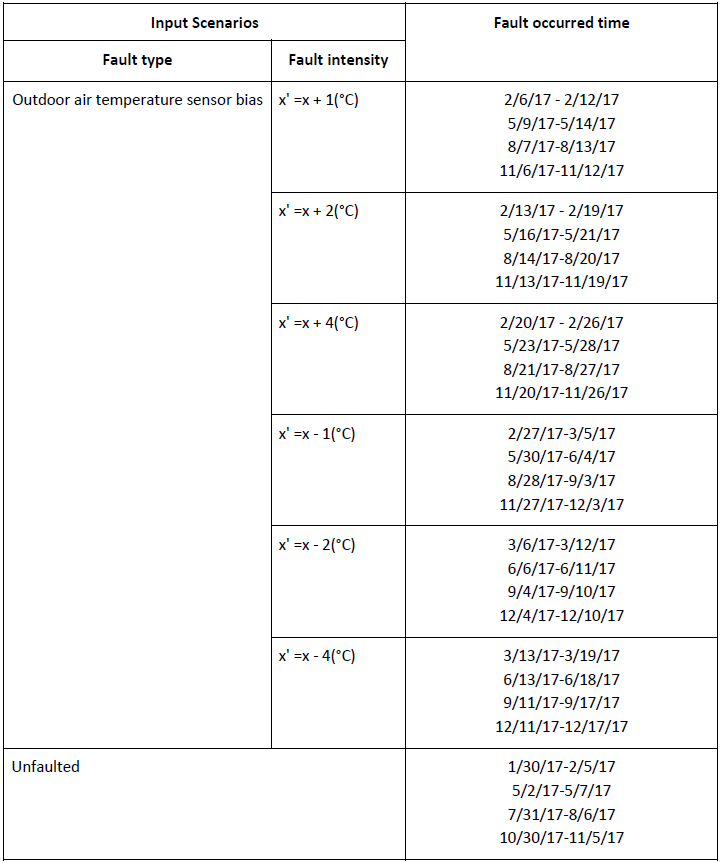

In [113]:
# Preparing function to convert data format used in dataset description to DateTime format
def convert_date(date_str):
    return pd.to_datetime(date_str, format='%m/%d/%y')

In [114]:
# Creating list of dates mentioned in the description
date_ranges_1 = [
        (convert_date('2/6/17'), convert_date('2/12/17')),
        (convert_date('5/9/17'), convert_date('5/14/17')),
        (convert_date('8/7/17'), convert_date('8/13/17')),
        (convert_date('11/6/17'), convert_date('11/12/17'))
    ]
date_ranges_2 = [
        (convert_date('2/13/17'), convert_date('2/19/17')),
        (convert_date('5/16/17'), convert_date('5/21/17')),
        (convert_date('8/14/17'), convert_date('8/20/17')),
        (convert_date('11/13/17'), convert_date('11/19/17'))
    ]
date_ranges_3 = [
        (convert_date('2/20/17'), convert_date('2/26/17')),
        (convert_date('5/23/17'), convert_date('5/28/17')),
        (convert_date('8/21/17'), convert_date('8/27/17')),
        (convert_date('11/20/17'), convert_date('11/26/17'))
    ]
date_ranges_4 = [
        (convert_date('2/27/17'), convert_date('3/5/17')),
        (convert_date('5/30/17'), convert_date('6/4/17')),
        (convert_date('8/28/17'), convert_date('9/3/17')),
        (convert_date('11/27/17'), convert_date('12/3/17'))
    ]
date_ranges_5 = [
        (convert_date('3/6/17'), convert_date('3/12/17')),
        (convert_date('6/6/17'), convert_date('6/11/17')),
        (convert_date('9/4/17'), convert_date('9/10/17')),
        (convert_date('12/4/17'), convert_date('12/10/17'))
    ]
date_ranges_6 = [
        (convert_date('3/13/17'), convert_date('3/19/17')),
        (convert_date('6/13/17'), convert_date('6/18/17')),
        (convert_date('9/11/17'), convert_date('9/17/17')),
        (convert_date('12/11/17'), convert_date('12/17/17'))
    ]


In [115]:
# creating and filling "Bias" column with appropiate values, changing bias unit to Fahreheit to match with other columns
data['Bias'] = 0
for start_date, end_date in date_ranges_1:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = 1.8
for start_date, end_date in date_ranges_2:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = 3.6
for start_date, end_date in date_ranges_3:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = 7.2
for start_date, end_date in date_ranges_4:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = - 1.8
for start_date, end_date in date_ranges_5:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = - 3.6
for start_date, end_date in date_ranges_6:
    data.loc[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date), 'Bias'] = - 7.2

In [116]:
# preparing DataFrame to store model evauation parameters
results_accuracy_final = pd.DataFrame(index=None, columns=['model','R2','Mae','Mse'])

In [117]:
# creating list of column containing diffence between predicted and actual values
anomal_col = [col for col in data_1.columns if "anomaly" in col]

In [118]:
# creating the loop to fill DataFrame with models evalusation parameters
for column in anomal_col:
    R2 = r2_score(data['Bias'], data_1[column])
    mse = mean_squared_error(data['Bias'], data_1[column])
    mae = mean_absolute_error(data['Bias'], data_1[column])
    name = column.split()[0]
    results_accuracy_final = results_accuracy_final.append(pd.Series({'model':name, 
                                'R2':R2,
                                'Mae': mae,
                                'Mse':mse}),ignore_index=True )

C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\3965092077.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_final = results_accuracy_final.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\3965092077.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_final = results_accuracy_final.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\3965092077.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_final = results_accuracy_final.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\3965092077.py:7: FutureWarning: The frame.append method is depre

In [119]:
print(results_accuracy_final)

                       model        R2       Mae        Mse
0        KNeighborsRegressor  0.530223  2.287619   9.132466
1               MLPRegressor  0.783940  1.513926   4.200198
2          AdaBoostRegressor  0.490082  2.459238   9.912805
3  GradientBoostingRegressor  0.730186  1.485933   5.245189
4          CatBoostRegressor  0.697601  1.580234   5.878633
5           BaggingRegressor  0.487531  2.301358   9.962388
6      RandomForestRegressor  0.498715  2.239666   9.744985
7      DecisionTreeRegressor  0.424815  2.366066  11.181599
8           LinearRegression -0.971945  4.672935  38.334613


We can see that final scores are worse that in the dataset with unfaulted sensor bias. However the best models have mean absolute errors lower than minimal bias so we can say that this approach is sufficent for task fo detecting temperature biases. 

## Method 2 - bias as a target

### Data preparation

In [124]:
X = data.drop(['Datetime','Fault Detection Ground Truth','Bias'], axis=1)

In [125]:
y = data['Bias']

### Train test split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [80]:
# preparing DataFrame to store model evauation parameters
results_accuracy_1 = pd.DataFrame(index=None, columns=['model','train_R2','test_R2','train_Mae','test_Mae','train_Mse','test_Mse'])

In [130]:
models_1= []

In [128]:
# creating the loop to train and evaluate each model, creating predictions for whole dataset for each model
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train)
    models_1.append(model)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)  
    results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name, 
                                'train_R2':R2_train,
                                'test_R2':R2_test,
                                'train_Mae':mae_train,
                                'test_Mae':mae_test,
                                'train_Mse':mse_train,
                                'test_Mse':mse_test}),ignore_index=True )

C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

Learning rate set to 0.087171
0:	learn: 4.2822073	total: 17ms	remaining: 16.9s
1:	learn: 4.1676191	total: 31.8ms	remaining: 15.9s
2:	learn: 4.0640966	total: 47.1ms	remaining: 15.6s
3:	learn: 3.9694300	total: 61.9ms	remaining: 15.4s
4:	learn: 3.8819482	total: 79.4ms	remaining: 15.8s
5:	learn: 3.7988911	total: 101ms	remaining: 16.7s
6:	learn: 3.7229489	total: 119ms	remaining: 16.8s
7:	learn: 3.6477186	total: 135ms	remaining: 16.8s
8:	learn: 3.5792271	total: 156ms	remaining: 17.1s
9:	learn: 3.5147200	total: 172ms	remaining: 17s
10:	learn: 3.4519423	total: 187ms	remaining: 16.8s
11:	learn: 3.3977860	total: 203ms	remaining: 16.7s
12:	learn: 3.3402096	total: 221ms	remaining: 16.8s
13:	learn: 3.2919195	total: 237ms	remaining: 16.7s
14:	learn: 3.2444574	total: 254ms	remaining: 16.7s
15:	learn: 3.2032349	total: 269ms	remaining: 16.5s
16:	learn: 3.1648966	total: 285ms	remaining: 16.5s
17:	learn: 3.1132619	total: 302ms	remaining: 16.4s
18:	learn: 3.0744679	total: 317ms	remaining: 16.4s
19:	learn:

171:	learn: 0.9066776	total: 2.82s	remaining: 13.6s
172:	learn: 0.8995258	total: 2.85s	remaining: 13.6s
173:	learn: 0.8969155	total: 2.86s	remaining: 13.6s
174:	learn: 0.8930222	total: 2.88s	remaining: 13.6s
175:	learn: 0.8879408	total: 2.89s	remaining: 13.5s
176:	learn: 0.8858660	total: 2.9s	remaining: 13.5s
177:	learn: 0.8800425	total: 2.92s	remaining: 13.5s
178:	learn: 0.8730685	total: 2.94s	remaining: 13.5s
179:	learn: 0.8680753	total: 2.96s	remaining: 13.5s
180:	learn: 0.8608910	total: 2.98s	remaining: 13.5s
181:	learn: 0.8574710	total: 2.99s	remaining: 13.4s
182:	learn: 0.8537951	total: 3.01s	remaining: 13.4s
183:	learn: 0.8503137	total: 3.02s	remaining: 13.4s
184:	learn: 0.8443739	total: 3.04s	remaining: 13.4s
185:	learn: 0.8381381	total: 3.06s	remaining: 13.4s
186:	learn: 0.8328983	total: 3.07s	remaining: 13.3s
187:	learn: 0.8304744	total: 3.08s	remaining: 13.3s
188:	learn: 0.8278365	total: 3.1s	remaining: 13.3s
189:	learn: 0.8234534	total: 3.11s	remaining: 13.3s
190:	learn: 0.

335:	learn: 0.4965241	total: 5.42s	remaining: 10.7s
336:	learn: 0.4948076	total: 5.43s	remaining: 10.7s
337:	learn: 0.4932651	total: 5.46s	remaining: 10.7s
338:	learn: 0.4923858	total: 5.47s	remaining: 10.7s
339:	learn: 0.4910134	total: 5.49s	remaining: 10.7s
340:	learn: 0.4900442	total: 5.51s	remaining: 10.6s
341:	learn: 0.4894501	total: 5.52s	remaining: 10.6s
342:	learn: 0.4885710	total: 5.54s	remaining: 10.6s
343:	learn: 0.4879337	total: 5.55s	remaining: 10.6s
344:	learn: 0.4869585	total: 5.56s	remaining: 10.6s
345:	learn: 0.4858192	total: 5.58s	remaining: 10.5s
346:	learn: 0.4854281	total: 5.59s	remaining: 10.5s
347:	learn: 0.4841324	total: 5.61s	remaining: 10.5s
348:	learn: 0.4829845	total: 5.63s	remaining: 10.5s
349:	learn: 0.4813545	total: 5.65s	remaining: 10.5s
350:	learn: 0.4804792	total: 5.67s	remaining: 10.5s
351:	learn: 0.4790952	total: 5.68s	remaining: 10.5s
352:	learn: 0.4781656	total: 5.69s	remaining: 10.4s
353:	learn: 0.4778361	total: 5.71s	remaining: 10.4s
354:	learn: 

505:	learn: 0.3923332	total: 8.27s	remaining: 8.07s
506:	learn: 0.3920005	total: 8.29s	remaining: 8.06s
507:	learn: 0.3918148	total: 8.3s	remaining: 8.04s
508:	learn: 0.3915759	total: 8.32s	remaining: 8.03s
509:	learn: 0.3912447	total: 8.34s	remaining: 8.01s
510:	learn: 0.3909672	total: 8.36s	remaining: 8s
511:	learn: 0.3905115	total: 8.38s	remaining: 7.98s
512:	learn: 0.3901446	total: 8.39s	remaining: 7.97s
513:	learn: 0.3896193	total: 8.4s	remaining: 7.95s
514:	learn: 0.3891985	total: 8.42s	remaining: 7.93s
515:	learn: 0.3886996	total: 8.44s	remaining: 7.91s
516:	learn: 0.3882419	total: 8.45s	remaining: 7.9s
517:	learn: 0.3881259	total: 8.47s	remaining: 7.88s
518:	learn: 0.3877684	total: 8.49s	remaining: 7.86s
519:	learn: 0.3873879	total: 8.5s	remaining: 7.85s
520:	learn: 0.3869913	total: 8.52s	remaining: 7.83s
521:	learn: 0.3865196	total: 8.54s	remaining: 7.82s
522:	learn: 0.3862497	total: 8.55s	remaining: 7.8s
523:	learn: 0.3858258	total: 8.56s	remaining: 7.78s
524:	learn: 0.385585

675:	learn: 0.3494795	total: 11.3s	remaining: 5.4s
676:	learn: 0.3493249	total: 11.3s	remaining: 5.39s
677:	learn: 0.3490968	total: 11.3s	remaining: 5.37s
678:	learn: 0.3489577	total: 11.3s	remaining: 5.35s
679:	learn: 0.3488297	total: 11.3s	remaining: 5.33s
680:	learn: 0.3487222	total: 11.3s	remaining: 5.32s
681:	learn: 0.3485652	total: 11.4s	remaining: 5.3s
682:	learn: 0.3484011	total: 11.4s	remaining: 5.28s
683:	learn: 0.3482694	total: 11.4s	remaining: 5.27s
684:	learn: 0.3479525	total: 11.4s	remaining: 5.25s
685:	learn: 0.3476569	total: 11.4s	remaining: 5.23s
686:	learn: 0.3474156	total: 11.4s	remaining: 5.22s
687:	learn: 0.3472010	total: 11.5s	remaining: 5.2s
688:	learn: 0.3470494	total: 11.5s	remaining: 5.18s
689:	learn: 0.3469186	total: 11.5s	remaining: 5.17s
690:	learn: 0.3467414	total: 11.5s	remaining: 5.15s
691:	learn: 0.3465636	total: 11.5s	remaining: 5.13s
692:	learn: 0.3463618	total: 11.5s	remaining: 5.11s
693:	learn: 0.3461299	total: 11.6s	remaining: 5.09s
694:	learn: 0.3

838:	learn: 0.3243543	total: 14.1s	remaining: 2.7s
839:	learn: 0.3242894	total: 14.1s	remaining: 2.69s
840:	learn: 0.3241275	total: 14.1s	remaining: 2.67s
841:	learn: 0.3240095	total: 14.1s	remaining: 2.65s
842:	learn: 0.3239065	total: 14.1s	remaining: 2.63s
843:	learn: 0.3238041	total: 14.2s	remaining: 2.62s
844:	learn: 0.3237592	total: 14.2s	remaining: 2.6s
845:	learn: 0.3235822	total: 14.2s	remaining: 2.58s
846:	learn: 0.3234570	total: 14.2s	remaining: 2.57s
847:	learn: 0.3233685	total: 14.2s	remaining: 2.55s
848:	learn: 0.3232968	total: 14.2s	remaining: 2.53s
849:	learn: 0.3232369	total: 14.3s	remaining: 2.52s
850:	learn: 0.3231617	total: 14.3s	remaining: 2.5s
851:	learn: 0.3229561	total: 14.3s	remaining: 2.48s
852:	learn: 0.3228528	total: 14.3s	remaining: 2.46s
853:	learn: 0.3227521	total: 14.3s	remaining: 2.45s
854:	learn: 0.3226822	total: 14.3s	remaining: 2.43s
855:	learn: 0.3225754	total: 14.3s	remaining: 2.41s
856:	learn: 0.3224908	total: 14.4s	remaining: 2.4s
857:	learn: 0.32

C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_accuracy_1 = results_accuracy_1.append(pd.Series({'model':name,
C:\Users\piotr.krysztopa\AppData\Local\Temp\ipykernel_24156\793537744.py:16: FutureWarning: The frame.append method is deprecated and will be remove

### Models evaluation

In [129]:
results_accuracy_1

,model,train_R2,test_R2,train_Mae,test_Mae,train_Mse,test_Mse
0,KNeighborsRegressor,0.994800,0.991144,5.978602e-02,0.092902,1.010203e-01,0.173083
1,MLPRegressor,0.982152,0.981174,3.561695e-01,0.363788,3.467640e-01,0.367946
2,AdaBoostRegressor,0.346158,0.336819,2.849917e+00,2.877461,1.270305e+01,12.961778
3,GradientBoostingRegressor,0.850487,0.842336,1.264571e+00,1.293714,2.904797e+00,3.081517
4,CatBoostRegressor,0.995148,0.994355,2.001628e-01,0.208406,9.426590e-02,0.110338
5,BaggingRegressor,0.999366,0.996890,1.823689e-02,0.046885,1.231356e-02,0.060779
6,RandomForestRegressor,0.999622,0.997249,1.657113e-02,0.044622,7.347570e-03,0.053776
7,DecisionTreeRegressor,1.000000,0.994592,2.488340e-14,0.034855,3.771313e-27,0.105705
8,LinearRegression,0.439766,0.431858,2.662568e+00,2.683332,1.088442e+01,11.104245


We can see that this approach produce much better results than previous one with most of the models. One of the reasons could be because the training dataset was much bigger. We can't also completly rule out that the model is in some way overtrained because it has only 6 unique values of biases, and could peforme worse if this bias was diffrent.

However two of this approaches are sufficent enoght to make a tool for this type of fault detection assuming that the AHU specification will be the dame.